In [ ]:
from dataloader import *
from model import *
from train import *

from matplotlib import pyplot as plt
import numpy as np

In [ ]:
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Resize(size=(224, 224))
            ])
            
dataloader = get_loader(
    root_folder="data/flickr8k/images/",
    annotation_file="data/flickr8k/captions.txt",
    transform=transform
)

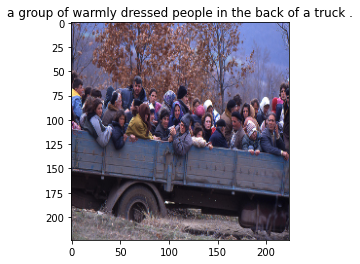

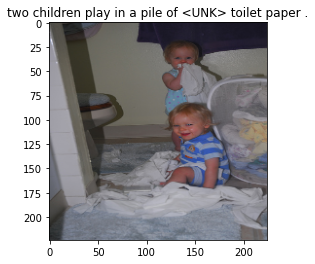

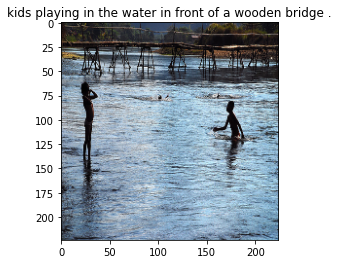

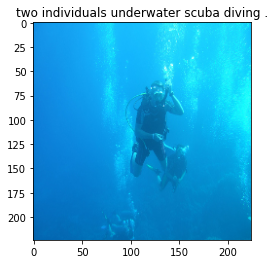

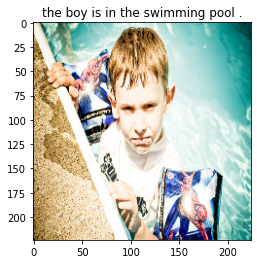

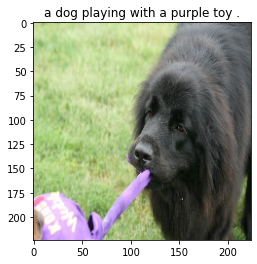

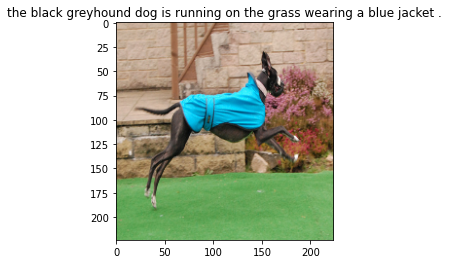

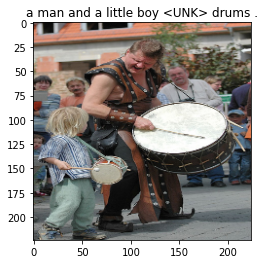

In [21]:
def show_example(dataloader, num_examples=8):
    images, captions = next(iter(dataloader))
    for idx, img in enumerate(images):
        if idx == num_examples:
            break

        vector = [ captions[row, idx].item() for row in range(len(captions)) ]  #   get all words tokenize of this image
        label_vector = [dataloader.dataset.vocab.itos[word] for word in vector] #   convert tokenizes to words
        eos_index = label_vector.index('<EOS>')     #   find index of <EOS>
        label_vector = label_vector[1 : eos_index]  #   remove <SOS> and <EOS>

        plt.imshow(np.transpose(img, (1, 2, 0)))
        plt.title(' '.join(label_vector))
        plt.show()

show_example(dataloader)